## Пояснение
Метод активного контура работает итеративно - результат зависит от количества итераций

В презентации (по проекту) это нужно было наглядно продемонстрировать. Решено было сделать гифку: взять одно изображение из всей выборки, пропустить его через метод активного контура сохранив промежуточные реззультаты в виде картинок, а потом склеить их в гифку (при помощи сторонних ресурсов).

In [1]:
from skimage import io
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient)


import matplotlib.pyplot as plt
from my_functions import to_gray
import numpy as np


import glob
from tqdm.notebook import tqdm


#минусы активного контура, под размер изображения приходится подгонять число итераций

In [2]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store

In [3]:
def AC(raw_image, callback, r_coef=1.4, g_coef=0.8, b_coef=0.8, threshold=0.87, iterations=370):
    # можно менять количество итераций, коэфициенты при перевода в серый, трешолд
    # принимает rgb картинку, возвращает копию картинки с выделенной меланомой
    # эти параметры подбирались вручную и могут быть не оптимальными
    
    image = to_gray(raw_image, r_coef=r_coef, g_coef=g_coef, b_coef=b_coef)
    
    gimage = inverse_gaussian_gradient(image / 255)
    
    init_ls = np.zeros(image.shape, dtype=np.int8)
    init_ls[10:-10, 10:-10] = 1

    ls = morphological_geodesic_active_contour(gimage, iterations=iterations,
                                               init_level_set=init_ls,
                                               smoothing=1, balloon=-1,
                                               threshold=threshold, iter_callback=callback)

    AC_image = raw_image.copy()
    AC_image[ls == 0] = (0, 0, 0)
    
    return AC_image, ls

In [4]:
evolution = []
callback = store_evolution_in(evolution)

image_names = glob.glob('data/images/3155.png')
raw_image = io.imread(image_names[0])[:,:,:3]
AC_image, ls = AC(raw_image, callback, iterations=450)

In [5]:
# если папки making_gif нет то ее нужно создать
import os

current_dir = os.getcwd()

if not os.path.exists(current_dir+'\\making_gif'):
     os.mkdir(current_dir+'\\making_gif')

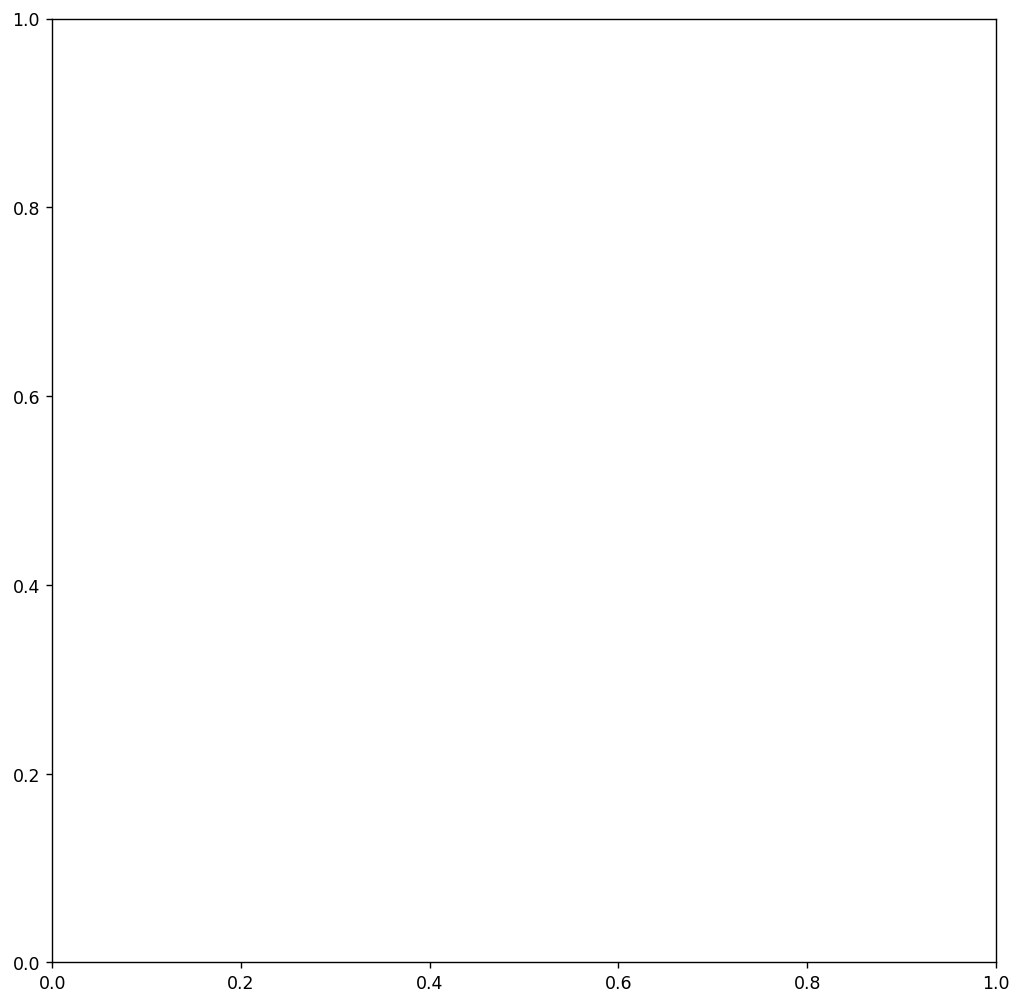

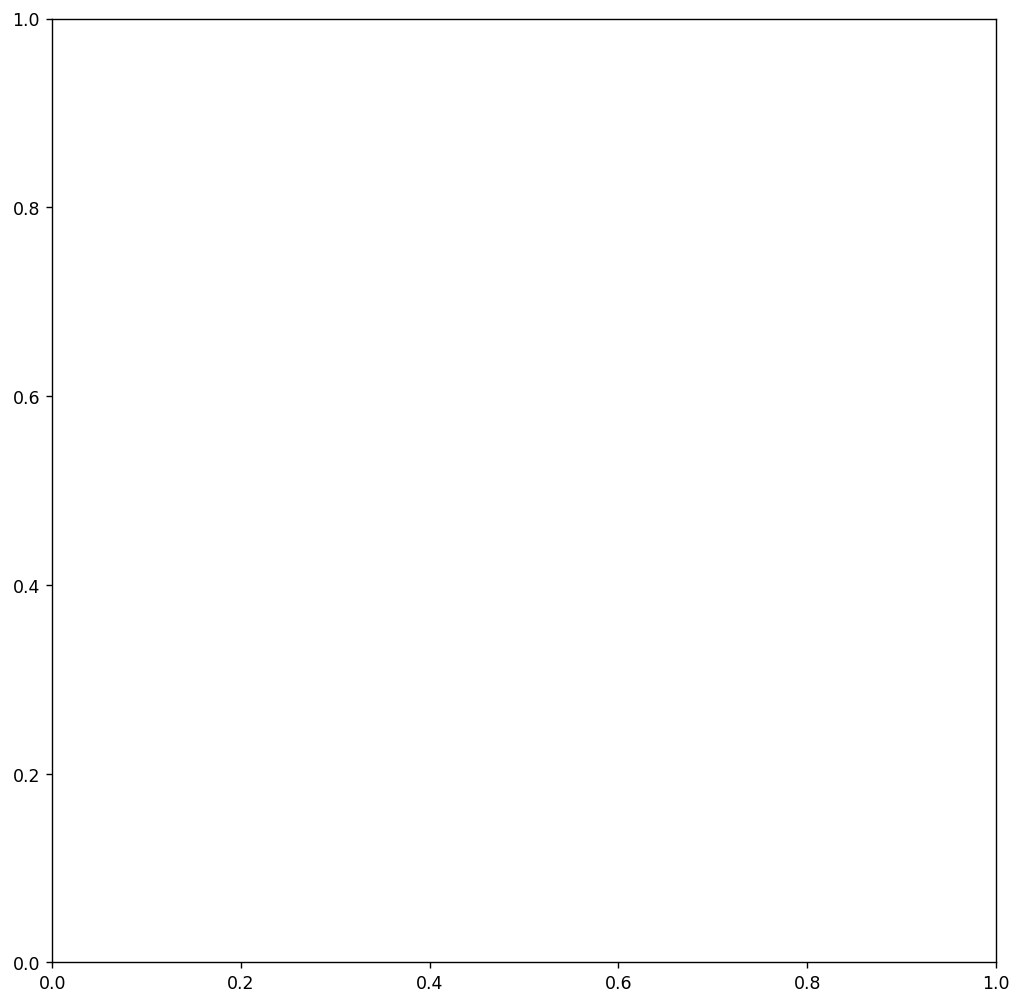

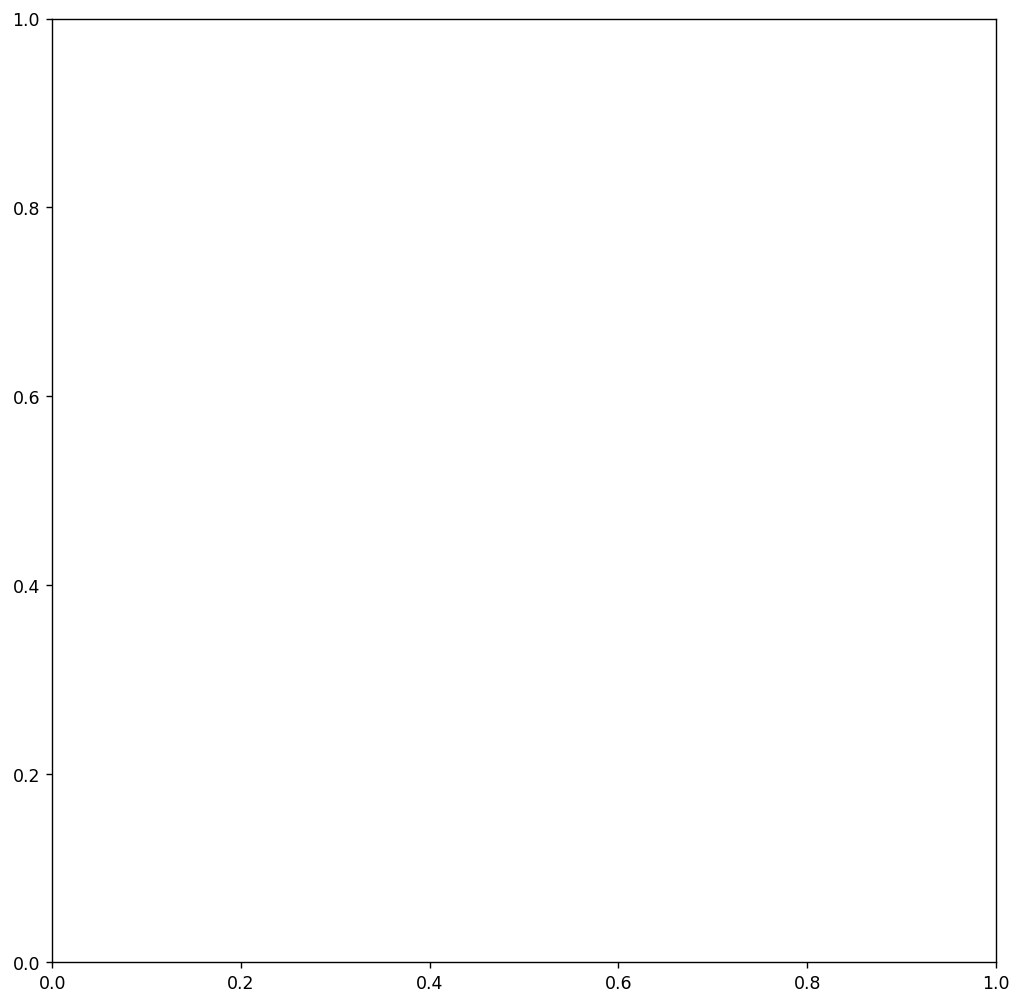

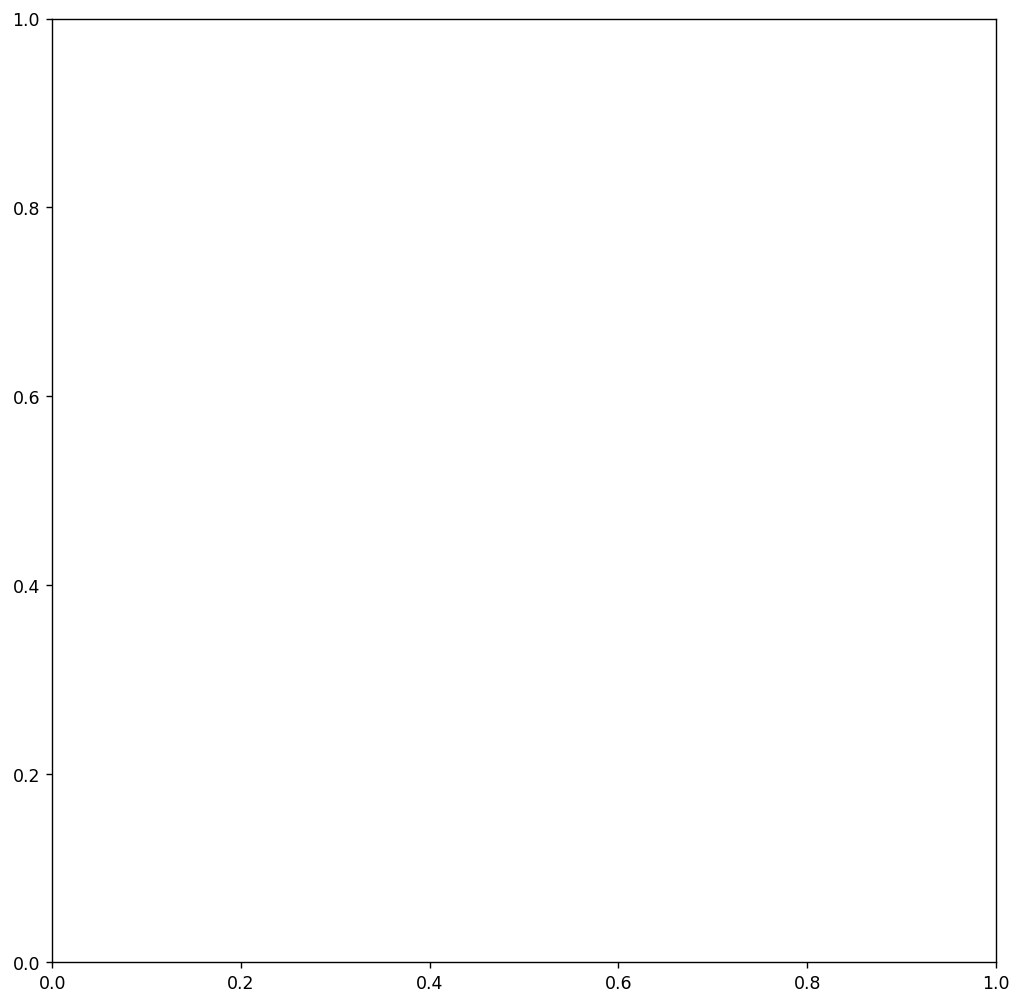

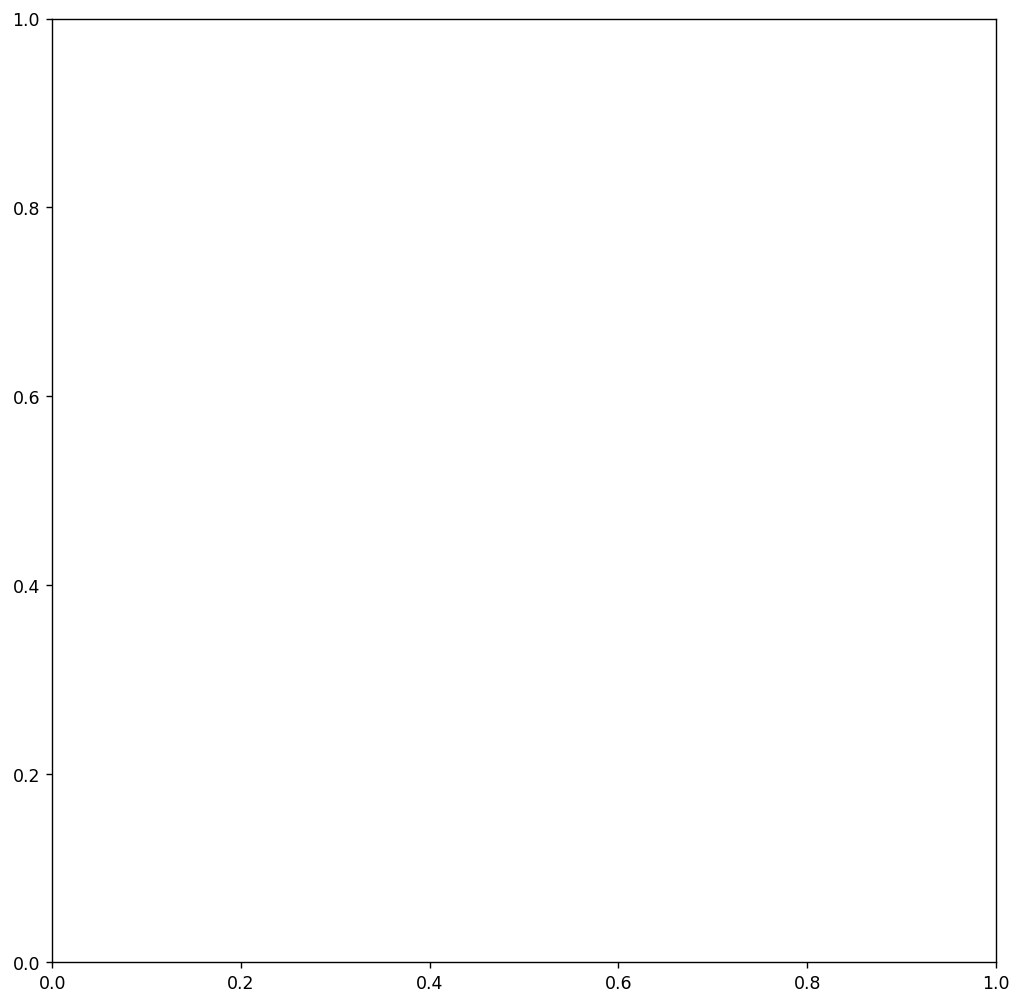

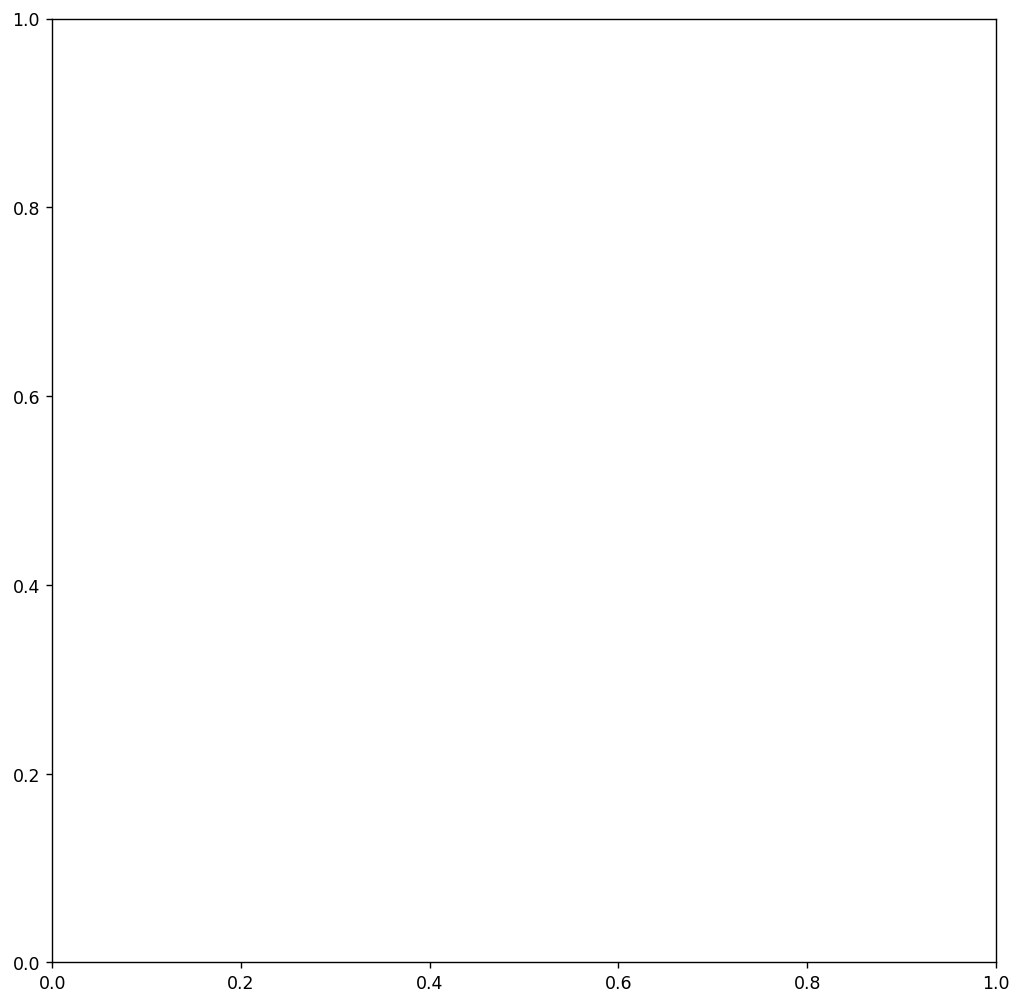

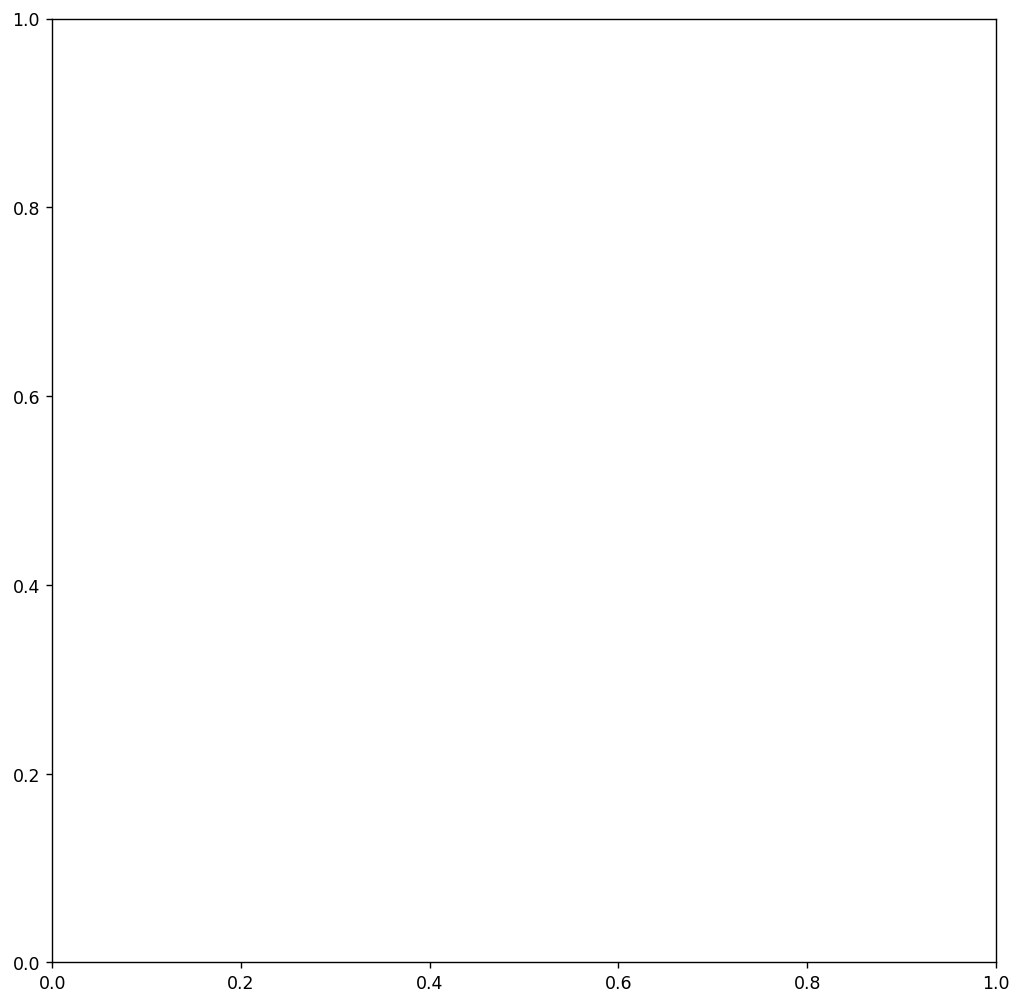

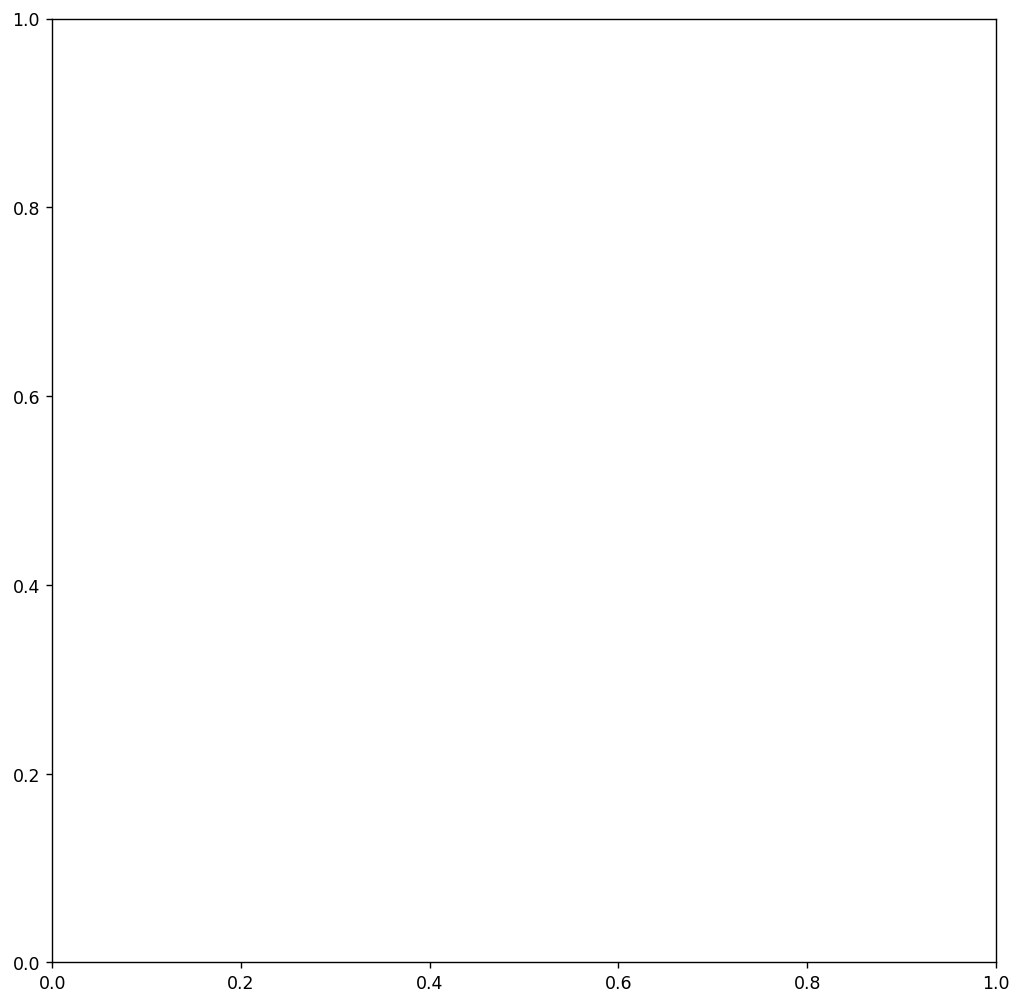

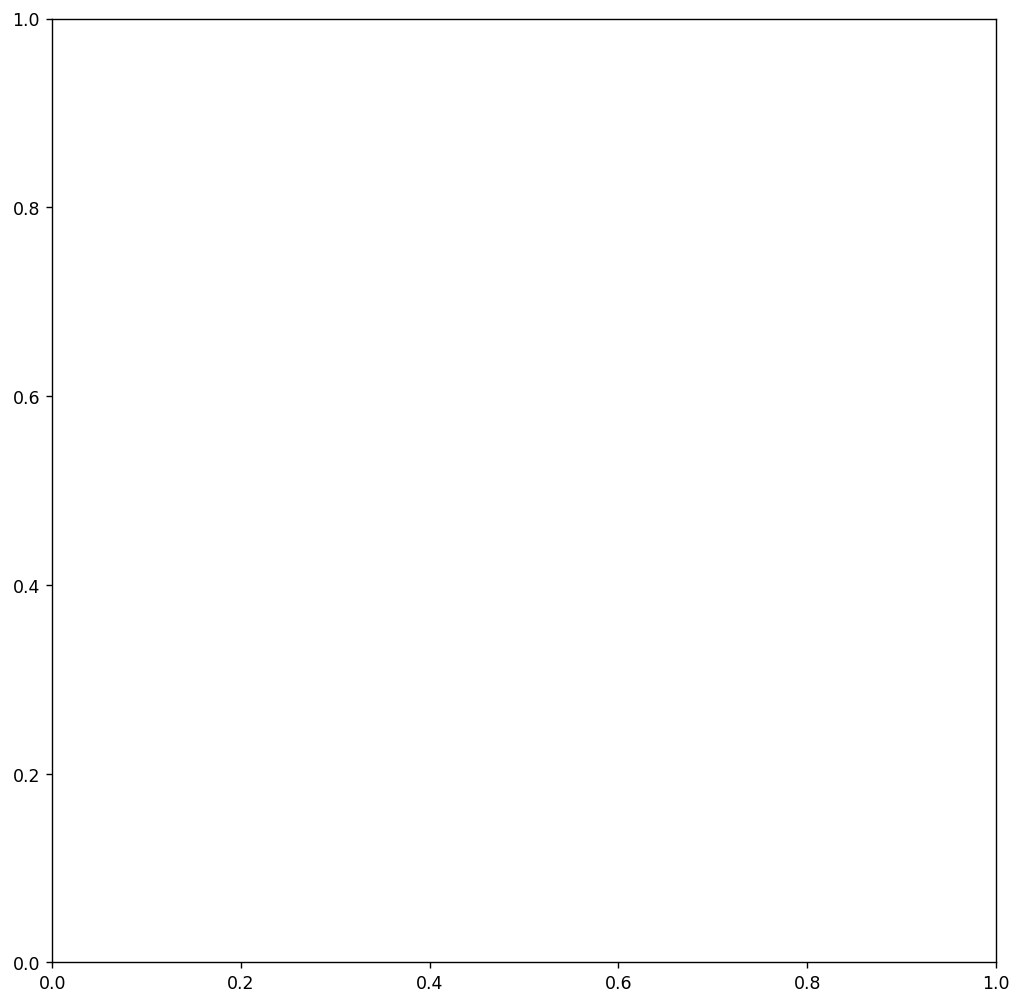

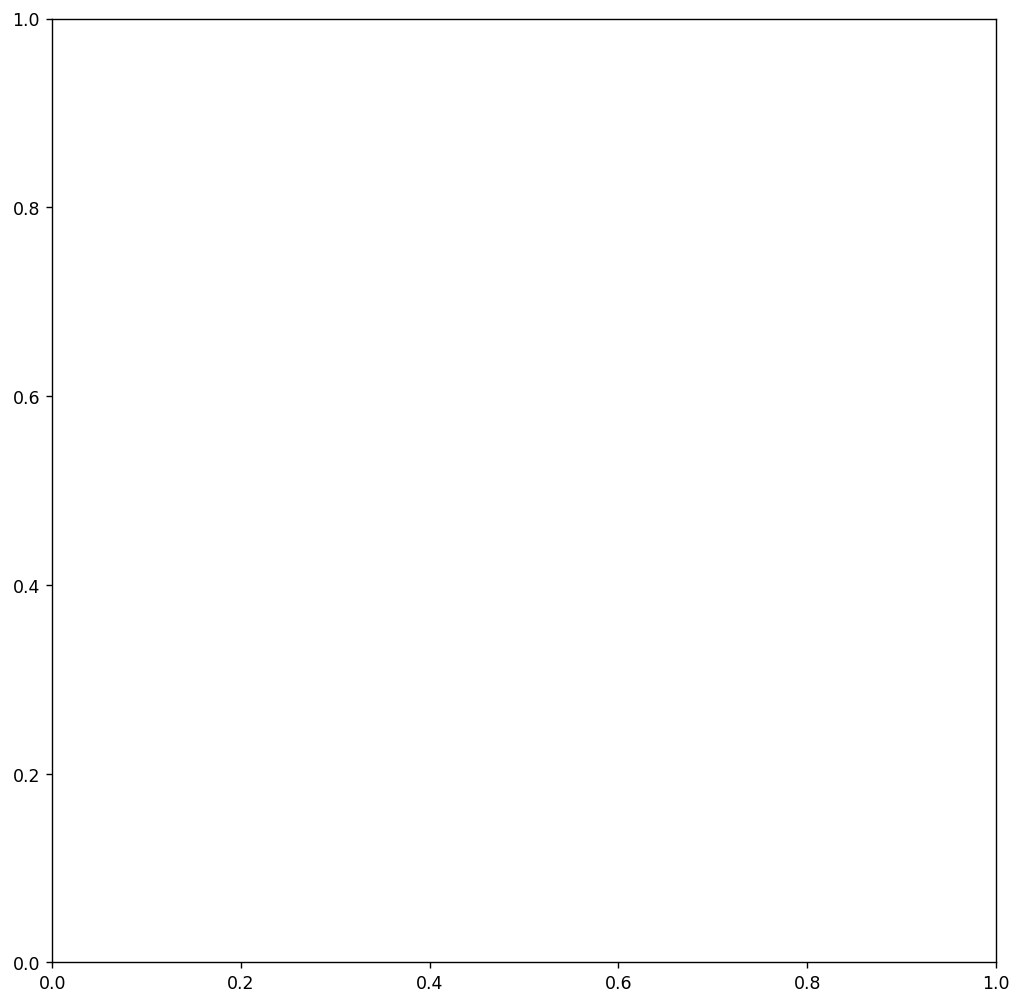

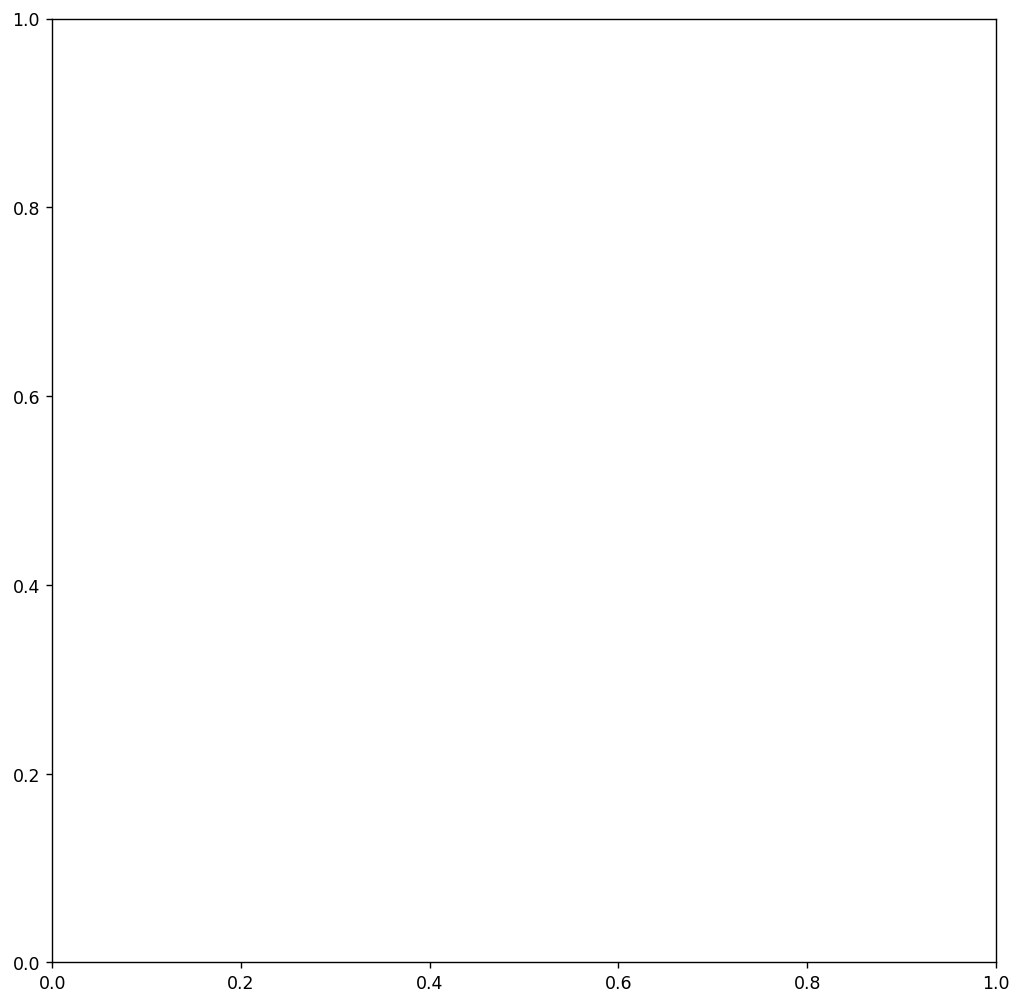

In [6]:
for i in list([0, 10, 50, 100, 150, 200, 250, 300, 350, 370, 450]):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=125)
    
    plot_image=raw_image.copy()
    plot_image[evolution[i] == 0] = (0, 0, 0)
    ax.imshow(plot_image)
    ax.set_axis_off()
    ax.contour(evolution[i], [0.5], colors='b')
    
    fig.savefig(f'making_gif/{i}', bbox_inches='tight')
    ax.clear()